In [1]:
import numpy as np
import copy
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import random
import math
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression

In [2]:
def get_classwise(train_data, train_labels):
    dct = {}
    for i in range(len(train_data)):
        if train_labels[i] not in dct.keys():
            dct[train_labels[i]] = [train_data[i]]
        else:
            dct[train_labels[i]].append(train_data[i])
    return dct

def get_data(dct, ini, ky, hwmch):
    tst_dt = []
    tst_lbl = []
    tr_dt = []
    tr_lbl = []
    for i in range(len(dct[ky])):
        if i >= ini and i < (ini+hwmch):
            if i >= len(dct[ky]):
                break
            else:
                tst_dt.append(dct[ky][i])
                tst_lbl.append(ky)
        else:
            tr_dt.append(dct[ky][i])
            tr_lbl.append(ky)
    return tr_dt, tr_lbl, tst_dt, tst_lbl, ini+hwmch

def K_fold(train_data, train_label, k):
    dct = get_classwise(train_data, train_label)
    ins = []
    cont = []
    for i in range(len(dct.keys())):
        ins.append(0)
        cont.append(int(len(dct[i])/k))
    
    tr_accs, tst_accs, tr_mccs, tst_mccs, tr_ps, tst_ps, tr_rs, tst_rs, tr_f1s, tst_f1s = [],[],[],[],[],[],[],[],[],[] 
    for j in range(k):
        tr_dt = []
        tr_lbl = []
        tst_dt = []
        tst_lbl = []
        for i in dct.keys():
            tr_d, tr_l, tst_d, tst_l,upt = get_data(dct, ins[i], i, cont[i])
            tr_dt += tr_d
            tr_lbl += tr_l
            tst_dt += tst_d
            tst_lbl += tst_l
            ins[i] = upt
        
        tr_dt = np.array(tr_dt)
        tr_lbl = np.array(tr_lbl)
        tst_dt = np.array(tst_dt)
        tst_lbl = np.array(tst_lbl)
        
        #print(tr_dt.shape)
        #print(tst_dt.shape)
        
        idx = np.random.permutation(len(tr_dt))
        tr_x, tr_y = tr_dt[idx], tr_lbl[idx]
        
        idx = np.random.permutation(len(tst_dt))
        tst_x, tst_y = tst_dt[idx], tst_lbl[idx]
        
        
        
        clf = svm.SVC(kernel='linear')
        clf.fit(tr_x, tr_y)
        
        tr_sc = clf.score(tr_x, tr_y)
        tst_sc = clf.score(tst_x, tst_y)
        
        pred = clf.predict(tr_x)
        tr_mcc = matthews_corrcoef(tr_y, pred)
        prf = precision_recall_fscore_support(tr_y, pred, average='macro')
        tr_p = prf[0]
        tr_r = prf[1]
        tr_f1 = prf[2]
        
        pred = clf.predict(tst_x)
        tst_mcc = matthews_corrcoef(tst_y, pred)
        prf = precision_recall_fscore_support(tst_y, pred, average='macro')
        tst_p = prf[0]
        tst_r = prf[1]
        tst_f1 = prf[2]
        
        tr_accs.append(tr_sc)
        tst_accs.append(tst_sc)
        tr_mccs.append(tr_mcc)
        tst_mccs.append(tst_mcc)
        tr_ps.append(tr_p)
        tst_ps.append(tst_p)
        tr_rs.append(tr_r)
        tst_rs.append(tst_r)
        tr_f1s.append(tr_f1)
        tst_f1s.append(tst_f1)
        #print("Fold : ", j+1, " Train Acc : ", tr_sc, " Validation Acc : ", tst_sc)
        #print("Fold : ", j+1, " Train MCC : ", tr_mcc, " Validation MCC : ", tst_mcc)
        #print("Fold : ", j+1, " Train Precission : ", tr_p, " Validation Precission : ", tst_p)
        #print("Fold : ", j+1, " Train Recall : ", tr_r, " Validation Recall : ", tst_r)
        #print("Fold : ", j+1, " Train F1 : ", tr_f1, " Validation F1 : ", tst_f1)
        #print("-----------------------------------------------------------------------------------")
    return tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s



def K_fold2(train_data, train_label, k):
    dct = get_classwise(train_data, train_label)
    ins = []
    cont = []
    for i in range(len(dct.keys())):
        ins.append(0)
        cont.append(int(len(dct[i])/k))
    
    tr_accs, tst_accs, tr_mccs, tst_mccs, tr_ps, tst_ps, tr_rs, tst_rs, tr_f1s, tst_f1s = [],[],[],[],[],[],[],[],[],[] 
    for j in range(k):
        tr_dt = []
        tr_lbl = []
        tst_dt = []
        tst_lbl = []
        for i in dct.keys():
            tr_d, tr_l, tst_d, tst_l,upt = get_data(dct, ins[i], i, cont[i])
            tr_dt += tr_d
            tr_lbl += tr_l
            tst_dt += tst_d
            tst_lbl += tst_l
            ins[i] = upt
        
        tr_dt = np.array(tr_dt)
        tr_lbl = np.array(tr_lbl)
        tst_dt = np.array(tst_dt)
        tst_lbl = np.array(tst_lbl)
        
        #print(tr_dt.shape)
        #print(tst_dt.shape)
        
        idx = np.random.permutation(len(tr_dt))
        tr_x, tr_y = tr_dt[idx], tr_lbl[idx]
        
        idx = np.random.permutation(len(tst_dt))
        tst_x, tst_y = tst_dt[idx], tst_lbl[idx]
        
        
        
        clf = LogisticRegression(random_state=0)
        clf.fit(tr_x, tr_y)
        
        tr_sc = clf.score(tr_x, tr_y)
        tst_sc = clf.score(tst_x, tst_y)
        
        pred = clf.predict(tr_x)
        tr_mcc = matthews_corrcoef(tr_y, pred)
        prf = precision_recall_fscore_support(tr_y, pred, average='macro')
        tr_p = prf[0]
        tr_r = prf[1]
        tr_f1 = prf[2]
        
        pred = clf.predict(tst_x)
        tst_mcc = matthews_corrcoef(tst_y, pred)
        prf = precision_recall_fscore_support(tst_y, pred, average='macro')
        tst_p = prf[0]
        tst_r = prf[1]
        tst_f1 = prf[2]
        
        tr_accs.append(tr_sc)
        tst_accs.append(tst_sc)
        tr_mccs.append(tr_mcc)
        tst_mccs.append(tst_mcc)
        tr_ps.append(tr_p)
        tst_ps.append(tst_p)
        tr_rs.append(tr_r)
        tst_rs.append(tst_r)
        tr_f1s.append(tr_f1)
        tst_f1s.append(tst_f1)
        #print("Fold : ", j+1, " Train Acc : ", tr_sc, " Validation Acc : ", tst_sc)
        #print("Fold : ", j+1, " Train MCC : ", tr_mcc, " Validation MCC : ", tst_mcc)
        #print("Fold : ", j+1, " Train Precission : ", tr_p, " Validation Precission : ", tst_p)
        #print("Fold : ", j+1, " Train Recall : ", tr_r, " Validation Recall : ", tst_r)
        #print("Fold : ", j+1, " Train F1 : ", tr_f1, " Validation F1 : ", tst_f1)
        #print("-----------------------------------------------------------------------------------")
    return tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s



def print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s):
    print("---------------------Training-------------------------------")
    print("Accuracy : ", np.mean(tr_accs))
    print("MCC : ", np.mean(tr_mccs))
    print("Precision : ", np.mean(tr_ps))
    print("Recall : ", np.mean(tr_rs))
    print("F1 : ", np.mean(tr_f1s))
    
    print("---------------------Validation-------------------------------")
    print("Accuracy : ", np.mean(tst_accs))
    print("MCC : ", np.mean(tst_mccs))
    print("Precision : ", np.mean(tst_ps))
    print("Recall : ", np.mean(tst_rs))
    print("F1 : ", np.mean(tst_f1s))

In [3]:
data1 = []
with open('kichdata.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        data1.append(row)

In [4]:
data1 = data1[1:]

data1 = np.array(data1)

data1 = data1[:,1:]

In [5]:
labels1 = []
with open('kichlabel.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        labels1.append(row)

In [6]:
labels1 = labels1[1:]

labels1 = np.array(labels1)[:,1:]

In [7]:
data2 = []
with open('kirpdata.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        data2.append(row)

In [8]:
data2 = data2[1:]

data2 = np.array(data2)

data2 = data2[:,1:]

In [9]:
labels2 = []
with open('kirplabel.csv','rt')as f:
  dt = csv.reader(f)
  for row in dt:
        labels2.append(row)

In [10]:
labels2 = labels2[1:]

labels2 = np.array(labels2)[:,1:]

labels2[labels2 == '1'] = '2'

In [11]:
data1.shape

(91, 20502)

In [12]:
data2.shape

(323, 20502)

In [13]:
u,c = np.unique(labels1 , return_counts=True)
u

array(['0', '1'], dtype='<U2')

In [14]:
c

array([25, 66], dtype=int64)

In [15]:
u,c = np.unique(labels2 , return_counts=True)
u

array(['0', '2'], dtype='<U3')

In [16]:
c

array([ 32, 291], dtype=int64)

In [17]:
data = np.append(data1, data2, axis = 0)

In [18]:
labels = np.append(labels1,labels2)

In [19]:
data.shape

(414, 20502)

In [20]:
labels.shape

(414,)

# Exp 2

In [21]:
data.shape

(414, 20502)

In [22]:
labels.shape

(414,)

In [23]:
data = data.astype(np.float)

In [24]:
data[0]

array([  9.1903,   0.    ,   0.    , ..., 592.7403,   1.9944,   8.3765])

In [25]:
labels = labels.astype(np.int)

In [26]:
u,c = np.unique(labels, return_counts = True)
u

array([0, 1, 2])

In [27]:
c

array([ 57,  66, 291], dtype=int64)

# Now process

In [28]:
labels = labels.reshape((len(labels),))

X_train2, X_test2, y_train, y_test = train_test_split(data, labels, test_size = 0.3, stratify = labels, random_state = 3)

scaler = preprocessing.StandardScaler().fit(X_train2) 

X_train = scaler.transform(X_train2)
X_test = scaler.transform(X_test2)

In [29]:
tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold(X_train, y_train, 10)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  1.0
MCC :  1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0
---------------------Validation-------------------------------
Accuracy :  0.975
MCC :  0.947694210667312
Precision :  0.9708585858585858
Recall :  0.9683333333333334
F1 :  0.9641898549793286


In [30]:
clf = svm.SVC(kernel='linear')

In [31]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
clf.score(X_test, y_test)

0.952

In [33]:
clf.score(X_train, y_train)

1.0

In [34]:
pca = PCA(n_components=2)

In [35]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca_data = pca.transform(X_train)

In [37]:
pca_data.shape

(289, 2)

In [38]:
import seaborn as sns 
import pandas as pd

In [39]:
pca_data.shape

(289, 2)

In [40]:
df = pd.DataFrame(pca_data, columns=["x", "y"])

In [41]:
df["val"] = pd.Series(y_train)

In [42]:
df["val"] = df["val"].apply(lambda x: "red" if x==1 else x)

In [43]:
df["val"] = df["val"].apply(lambda x: "blue" if x==0 else x)

In [44]:
df["val"] = df["val"].apply(lambda x: "brown" if x==2 else x)

In [45]:
df

,x,y,val
0,53.851776,-47.566175,brown
1,36.184751,-24.559713,blue
2,46.634938,124.397307,red
3,-38.447281,15.710436,brown
4,-4.663677,-32.434872,brown
5,66.080275,83.431489,red
6,74.008254,23.787601,red
7,-29.295472,-29.648732,brown
8,-2.186158,9.201667,brown
9,-23.306154,41.701134,brown


[]

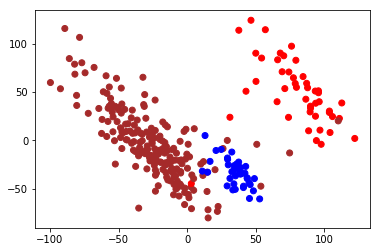

In [46]:
fig, ax = plt.subplots()
ax.scatter(x=df["x"], y=df["y"], c=df["val"])
plt.plot()

In [47]:
from sklearn.metrics import matthews_corrcoef

In [48]:
pred = clf.predict(X_test)

matthews_corrcoef(y_test, pred)

0.8951689611182359

In [49]:
pred = clf.predict(X_train)

matthews_corrcoef(y_train, pred)

1.0

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 3)

model.fit(X_train2,y_train)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [51]:
df = pd.DataFrame(data=X_train2[0:,0:],index=[i for i in range(X_train2.shape[0])], columns=['f'+str(i) for i in range(X_train2.shape[1])])

print(len(df))

df2 = pd.DataFrame(data=X_test2[0:,0:],index=[i for i in range(X_test2.shape[0])], columns=['f'+str(i) for i in range(X_test2.shape[1])])

print(len(df2))

289
125


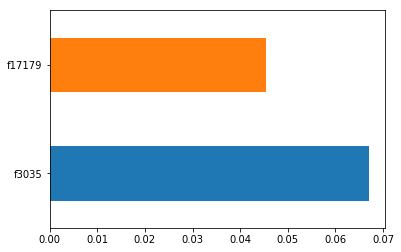

In [52]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.show()

In [53]:
fi = pd.Series(model.feature_importances_, index=df.columns)

ftr = fi.nlargest(2)

print(ftr.index)

Index(['f3035', 'f17179'], dtype='object')


In [54]:
npar = []
for i in range(len(ftr.index)):
    npar.append(df[ftr.index[i]].values)

npar = np.array(npar).T

print(npar.shape)


npar2 = []
for i in range(len(ftr.index)):
    npar2.append(df2[ftr.index[i]].values)

npar2 = np.array(npar2).T

print(npar2.shape)





scaler = preprocessing.StandardScaler().fit(npar)

X_train = scaler.transform(npar)

X_test = scaler.transform(npar2)

(289, 2)
(125, 2)


In [55]:
tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold(X_train, y_train, 10)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  0.9601532567049809
MCC :  0.9144812766191249
Precision :  0.9415253110284103
Recall :  0.9472894440107555
F1 :  0.9443053119502224
---------------------Validation-------------------------------
Accuracy :  0.9571428571428571
MCC :  0.9103950968197957
Precision :  0.9481601731601732
Recall :  0.9466666666666667
F1 :  0.9401938894557638


In [56]:
clf = svm.SVC(kernel='linear', probability = True)

clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
clf.score(X_test, y_test)

0.92

In [58]:
clf.score(X_train, y_train)

0.9619377162629758

In [59]:
pred = clf.predict(X_train)

matthews_corrcoef(y_train, pred)

0.9179987677990477

In [60]:
pred = clf.predict(X_test)

matthews_corrcoef(y_test, pred)

0.8221901104352671

In [61]:
import pickle
with open('my_dict_ft.pkl', 'rb') as fp:
    dct = pickle.load(fp)

for i in range(len(ftr)):
    print(dct[ftr.index[i]])

CCDC103
SPTBN2


In [62]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, pred, average='macro')

(0.8984898142792881, 0.860204991087344, 0.8780051807286444, None)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


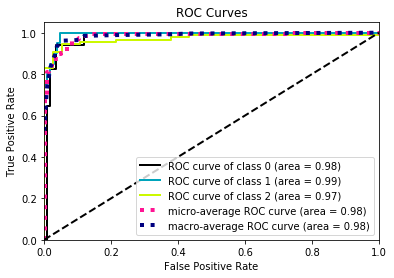

In [63]:
import scikitplot as skplt

y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [64]:
tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold2(X_train, y_train, 10)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  0.8931034482758621
MCC :  0.7630492234702133
Precision :  0.8849665628126955
Recall :  0.7772031399080579
F1 :  0.796821097728096
---------------------Validation-------------------------------
Accuracy :  0.8892857142857142
MCC :  0.7519456459441312
Precision :  0.9055019135453918
Recall :  0.7750000000000001
F1 :  0.7874675215543054


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train,y_train)

prd = clf.predict(X_test)

print("Accuracy : ",clf.score(X_test, y_test))

print("MCC : ",matthews_corrcoef(y_test, prd))

prf = precision_recall_fscore_support(y_test, prd, average='macro')
print("Precission : ",prf[0])
print("Recall : ",prf[1])
print("F1 : ",prf[2])

Accuracy :  0.864
MCC :  0.688267347939304
Precission :  0.8581632653061225
Recall :  0.7229500891265598
F1 :  0.7546594982078854


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


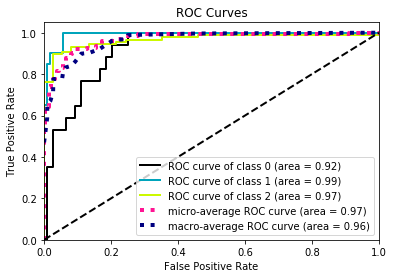

In [66]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [67]:
from sklearn.feature_selection import SelectKBest, chi2

skb = SelectKBest(chi2, k=2).fit(X_train2, y_train)
X_now_train = skb.transform(X_train2)
X_now_test = skb.transform(X_test2)


scaler = preprocessing.StandardScaler().fit(X_now_train)
X_now_train = scaler.transform(X_now_train)
X_now_test = scaler.transform(X_now_test)

tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s = K_fold2(X_now_train, y_train, 10)
print_metrics(tr_accs,tst_accs,tr_mccs,tst_mccs,tr_ps,tst_ps,tr_rs,tst_rs,tr_f1s,tst_f1s)

---------------------Training-------------------------------
Accuracy :  0.8187739463601533
MCC :  0.5906365145281841
Precision :  0.5897617955073292
Recall :  0.6242865816636309
F1 :  0.6025343421948628
---------------------Validation-------------------------------
Accuracy :  0.8357142857142856
MCC :  0.614469749744038
Precision :  0.5987328130806391
Recall :  0.6233333333333333
F1 :  0.6030797162243069


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

In [68]:
clf = LogisticRegression(random_state=0)

clf.fit(X_now_train,y_train)

prd = clf.predict(X_now_test)

print("Accuracy : ",clf.score(X_now_test, y_test))

print("MCC : ",matthews_corrcoef(y_test, prd))

prf = precision_recall_fscore_support(y_test, prd, average='macro')
print("Precission : ",prf[0])
print("Recall : ",prf[1])
print("F1 : ",prf[2])

Accuracy :  0.832
MCC :  0.6261277851257091
Precission :  0.6024464831804281
Recall :  0.6470588235294118
F1 :  0.6210326616417987


C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
